**Fashion MNIST Data Classification using** **CNN** **bold text**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import numpy as np

LOADING DATA

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


TRAINING DATA

In [3]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

Data

In [7]:
'''
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

'\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

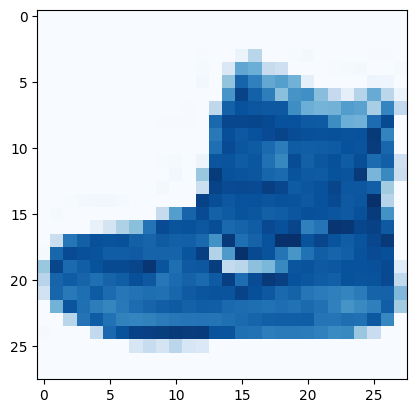

In [8]:
plt.imshow(X_train[0],cmap="Blues")

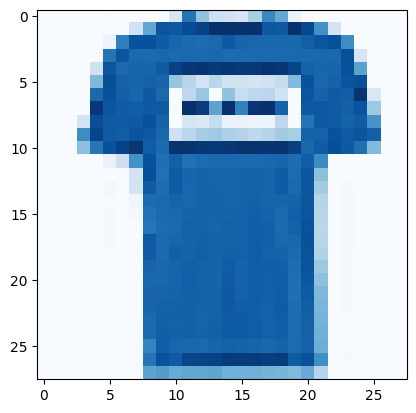

In [9]:
plt.imshow(X_train[1],cmap="Blues")

In [10]:
plt.figure(figsize=(16,16))

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


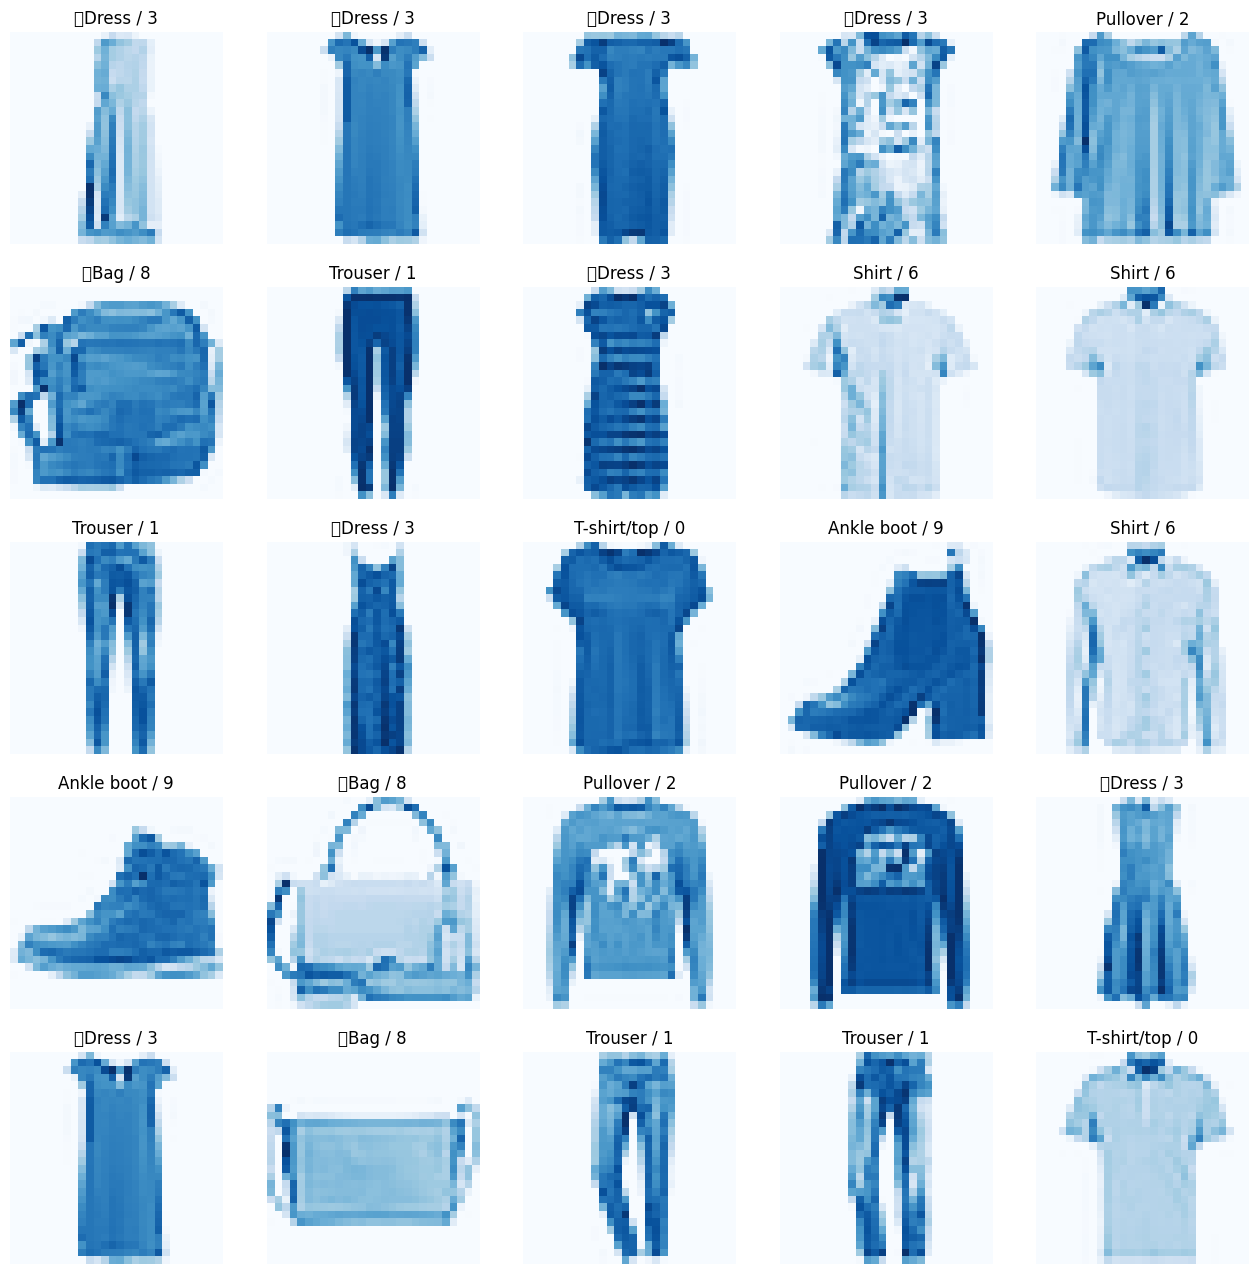

In [11]:
class_labels=["T-shirt/top","Trouser",	"Pullover","	Dress",	"Coat","	Sandal",	"Shirt",	"Sneaker","	Bag",	"Ankle boot"]
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_train[i],cmap="Blues")
    plt.axis('off')
    plt.title("{} / {}".format(class_labels[y_train[i]],y_train[i]))

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train.ndim

3

In [14]:
X_train = np.expand_dims(X_train,-1)

In [15]:
X_test.ndim

3

In [16]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [19]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [20]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [23]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 26s 261ms/step - loss: 0.6299 - accuracy: 0.7901 - val_loss: 0.4426 - val_accuracy: 0.8407
Epoch 2/10
94/94 [==============================] - 16s 174ms/step - loss: 0.3670 - accuracy: 0.8713 - val_loss: 0.3567 - val_accuracy: 0.8761
Epoch 3/10
94/94 [==============================] - 16s 166ms/step - loss: 0.3225 - accuracy: 0.8868 - val_loss: 0.3322 - val_accuracy: 0.8859
Epoch 4/10
94/94 [==============================] - 16s 170ms/step - loss: 0.2919 - accuracy: 0.8975 - val_loss: 0.3161 - val_accuracy: 0.8903
Epoch 5/10
94/94 [==============================] - 17s 175ms/step - loss: 0.2705 - accuracy: 0.9042 - val_loss: 0.2976 - val_accuracy: 0.8966
Epoch 6/10
94/94 [==============================] - 17s 179ms/step - loss: 0.2529 - accuracy: 0.9097 - val_loss: 0.2884 - val_accuracy: 0.8999
Epoch 7/10
94/94 [==============================] - 17s 177ms/step - loss: 0.2417 - accuracy: 0.9143 - val_loss: 0.2958 - val_accuracy: 0.8936

TESTING

In [24]:
X_test.ndim

3

In [25]:
X_test = np.expand_dims(X_test,-1)

In [26]:
X_test.ndim

4

In [27]:
X_test.shape

(10000, 28, 28, 1)

In [28]:
y_pred= model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.29, 0.06, 0.01]], dtype=float32)

In [29]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2820 - accuracy: 0.8975


[0.281980961561203, 0.8974999785423279]

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


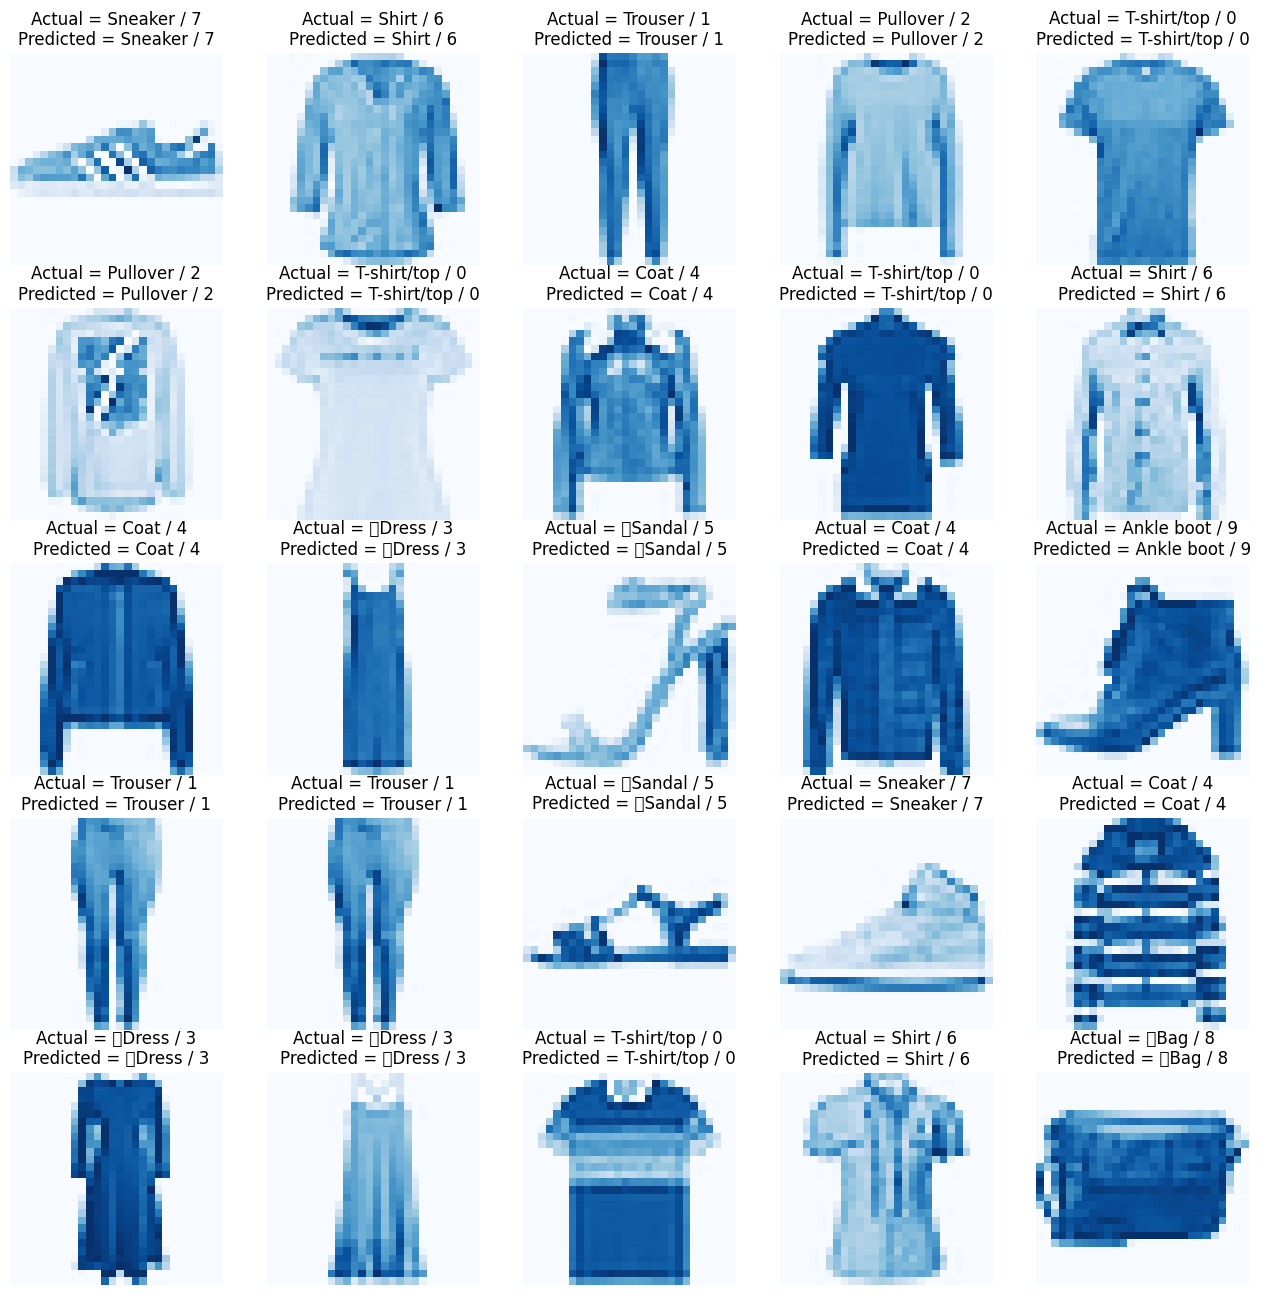

In [31]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap="Blues")
    plt.axis('off')
    plt.title("Actual = {} / {}\nPredicted = {} / {}".format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1600x900 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


              precision    recall  f1-score   support

 T-shirt/top       0.82      0.88      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.91      0.83      1000
      	Dress       0.86      0.94      0.90      1000
        Coat       0.86      0.82      0.84      1000
     	Sandal       0.97      0.98      0.98      1000
       Shirt       0.82      0.59      0.69      1000
     Sneaker       0.94      0.97      0.95      1000
        	Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


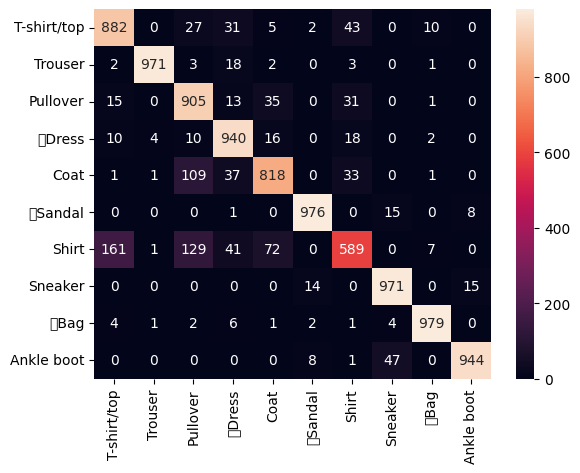

In [33]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

**SAVE MODEL**

In [34]:
model.save('Fashion_MNIST_cnn_model.h5')